In [1]:
from amad.demo.demo_aircraft_resources import CalculateAircraft
from amad.disciplines.design.resources.aircraft_geometry_library import (
        ac_narrow_body_long as airplane_geom,
    )
from amad.optimization.resources.set_parameters import single_aisle_concept
from cosapp.drivers import NonLinearSolver
from smt.sampling_methods import LHS
import numpy as np
import matplotlib.pyplot as plt
import pandas

File amad.disciplines.performance.systems.Deceleration.py does not contain a class named Deceleration. The file will be ignored.
File amad.disciplines.performance.systems.Descent.py does not contain a class named Descent. The file will be ignored.
File amad.disciplines.performance.systems.Climb.py does not contain a class named Climb. The file will be ignored.
File amad.disciplines.systems.fuel.systems.fuelVolume.py does not contain a class named fuelVolume. The file will be ignored.
File amad.disciplines.performance.systems.missionProfile.py does not contain a class named missionProfile. The file will be ignored.
File amad.disciplines.performance.systems.Acceleration.py does not contain a class named Acceleration. The file will be ignored.
File amad.disciplines.performance.systems.Cruise.py does not contain a class named Cruise. The file will be ignored.


In [15]:
ft2m = 1 / 3.281

def print_msg(ac_sys):
    """Print Routine

    Args:
        ac_sys (obj): summary of aircraft parameters
    """
    msg = (
        f"Wing Sweep = {ac_sys.delta_wing_sweep[1]}deg | "
        + f"Wing Root Chord = {ac_sys.chord_wing_root}m | "
        + f"Wing Taper Ratio = {ac_sys.r_wing_taper[1]} | "
        + f"Wing Span = {ac_sys.x_wing_span[1]}m | "
        + f"Crz fuel = {ac_sys.mass.m_fuel_cruise:.0f}kg | "
        + f"Fuse len = {ac_sys.x_fuse_out:.1f}m | "
        + f"Alt = {(ac_sys.z_altitude / ft2m):.0f}ft | "
        + f"MTO = {(ac_sys.m_mto):.0f}kg | "
        + f"solver code = {ac_sys.drivers['nls'].error_code} "
        
    )
    print(msg)

def run_all(ac_sys):
    calc_perf.run_drivers()
    print_msg(ac_sys)

tolerance = 1e-3 # 1e-2
calc_perf_init = CalculateAircraft("calc_perf", airplane_geom=airplane_geom())
calc_perf = single_aisle_concept(calc_perf_init)
calc_perf.add_driver(NonLinearSolver("nls", method="POWELL", tol=tolerance))
calc_perf.m_fuel_climb = 2300.0
calc_perf.m_fuel_descent = 300.0
calc_perf.m_fuel_taxi = 500.0
calc_perf.mass.m_fuel_cruise = 123.0
calc_perf.z_altitude = 11582.4  # cruise altitude
calc_perf.mach_current = 0.75  # cruise mach
calc_perf.thrust_eng = 120000.0
calc_perf.n_pax = 150
calc_perf.x_range = 5000 * 1000.0  # 5000km

# inner_sweep = (31.5 / 23.5) * 

run_all(calc_perf)
calc_perf.chord_wing_root = 8.4
run_all(calc_perf)

Wing Sweep = 23.5deg | Wing Root Chord = 8.57m | Wing Taper Ratio = 0.252 | Wing Span = 34.32m | Crz fuel = 17841kg | Fuse len = 29.8m | Alt = 38002ft | MTO = 61453kg | solver code = 0 
Wing Sweep = 23.5deg | Wing Root Chord = 8.4m | Wing Taper Ratio = 0.252 | Wing Span = 34.32m | Crz fuel = 21360kg | Fuse len = 29.8m | Alt = 38002ft | MTO = 69849kg | solver code = 0 


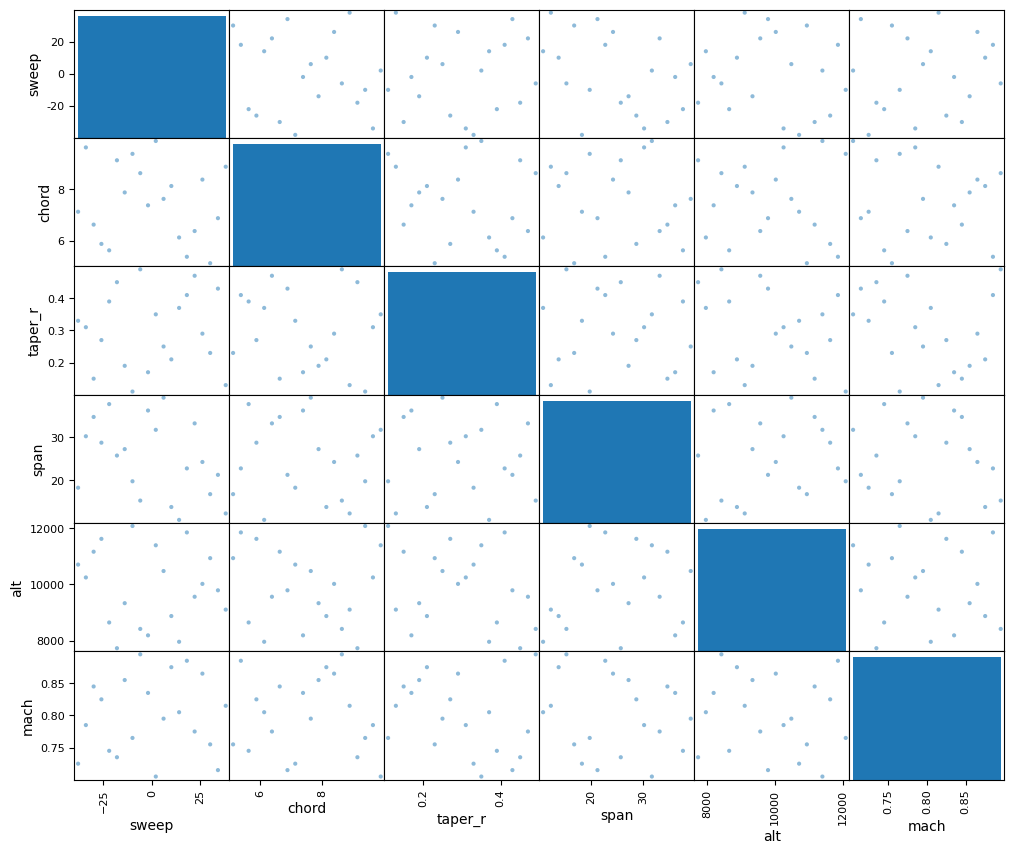

In [16]:
lim_sweep = [-40., 40.]
lim_r_chord = [5., 10]
lim_taper_r = [.1, .5]
lim_span = [10., 40.]
lim_alt = [25000 * ft2m, 40000 * ft2m]
lim_mach = [.7, .9]

xlimits = np.array([
    lim_sweep,
    lim_r_chord,
    lim_taper_r,
    lim_span,
    lim_alt,
    lim_mach
])

sampling = LHS(xlimits=xlimits)

num = 20
x = sampling(num)

x_df_axes = ['sweep', 'chord', 'taper_r', 'span', 'alt', 'mach']
x_df = pandas.DataFrame(x, columns=x_df_axes)
fig = pandas.plotting.scatter_matrix(x_df, figsize=(12,10))

In [17]:
for i in range(0, num):
    outer_sweep = x[:, 0][i]
    inner_sweep = (31.5 / 23.5) * outer_sweep

    calc_perf.delta_wing_sweep = [inner_sweep, outer_sweep]
    calc_perf.chord_wing_root = x[:, 1][i]
    calc_perf.r_wing_taper[1] = x[:, 2][i]
    calc_perf.x_wing_span[1] = x[:, 3][i]
    calc_perf.z_altitude = x[:, 4][i]

    run_all(calc_perf)
    

Wing Sweep = 38.0deg | Wing Root Chord = 8.875m | Wing Taper Ratio = 0.13 | Wing Span = 12.25m | Crz fuel = 80083kg | Fuse len = 29.8m | Alt = 29875ft | MTO = 72748kg | solver code = 0 
Wing Sweep = -6.0deg | Wing Root Chord = 8.625m | Wing Taper Ratio = 0.4900000000000001 | Wing Span = 15.25m | Crz fuel = 104980kg | Fuse len = 29.8m | Alt = 27625ft | MTO = 110557kg | solver code = 0 
Wing Sweep = 18.000000000000007deg | Wing Root Chord = 5.375m | Wing Taper Ratio = 0.41000000000000003 | Wing Span = 22.75m | Crz fuel = 14264kg | Fuse len = 29.8m | Alt = 38875ft | MTO = 150689kg | solver code = 0 
Wing Sweep = 22.0deg | Wing Root Chord = 6.375m | Wing Taper Ratio = 0.4700000000000001 | Wing Span = 33.25m | Crz fuel = 39013kg | Fuse len = 29.8m | Alt = 31375ft | MTO = 102125kg | solver code = 0 
Wing Sweep = -13.999999999999993deg | Wing Root Chord = 7.875m | Wing Taper Ratio = 0.19 | Wing Span = 27.250000000000004m | Crz fuel = 38759kg | Fuse len = 29.8m | Alt = 30625ft | MTO = 93971kg 

In [10]:
calc_perf.drivers['nls'].problem

Unknowns
  m_mto = 84888.38170841169
  mass.m_fuel_cruise = 26199.61244475644
Equations
  m_mto == mass.total_mass := -2.5218469090759754e-07
  mass.m_fuel_cruise == cruise_fuel.m_fuel_cruise.mass (loop) := 0.0

In [12]:
calc_perf.mass.m_mto

84888.38170841169